<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter3/chater3_3_sklearn_logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Colab Notebooks/pyml/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/pyml
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets

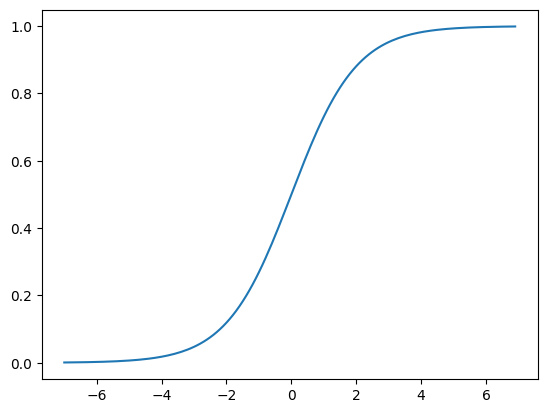

In [24]:
# 시그모이드 함수를 한번 그려보자
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z,sigma_z)


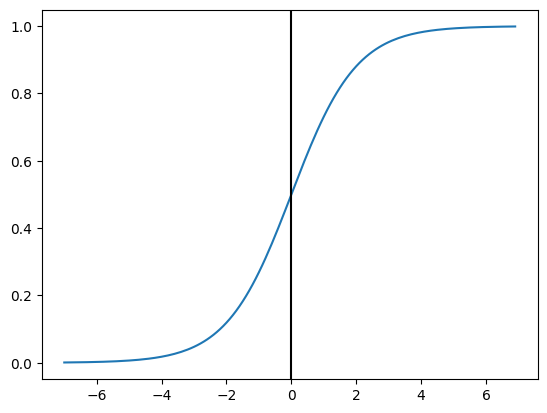

In [25]:
# 시그모이드 함수의 다른 특징들을 좀더 알아보자
# x = 0 에 대해 대칭이다
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0, color = 'k')

Text(0, 0.5, '$\\sigma (z)$')

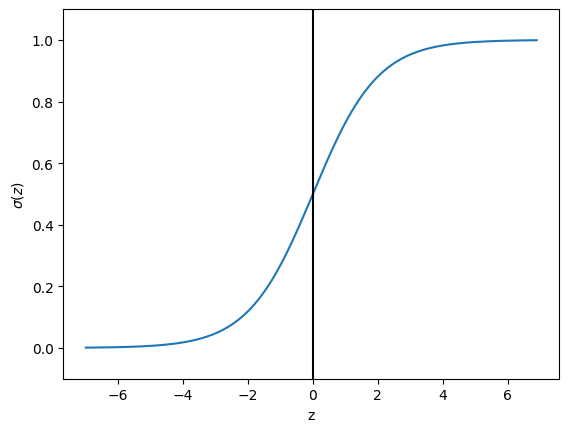

In [26]:
# 치역은 0.0 부터 1.0이고,
z = np.arange(-7,7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

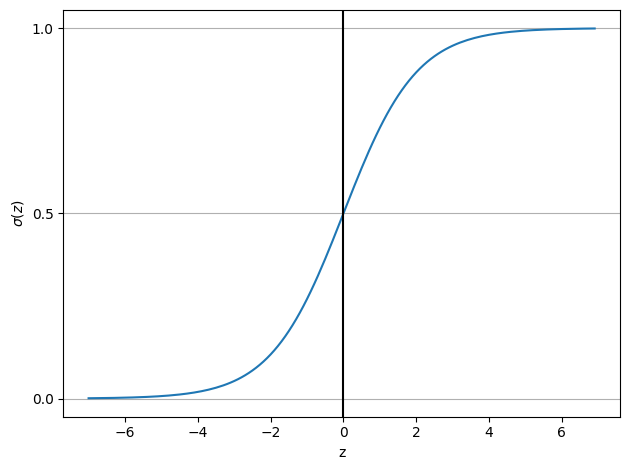

In [27]:
# y 축 눈금과 격자선도 그려보자
z = np.arange( -7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0, color = 'k')
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() # returns the current axes in the current figure
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## 로지스틱 손실 함수의 가중치 학습
모델 파라미터인 가중치 w와 절편 유닛 b를 어떻게 학습하는지 간단하게 살펴보자

일단 logistic loss function 에 대해서는 cs229에서 충분히 배웠으므로, perceptron 구현처럼 scratch로 구현하는걸 연습해보자

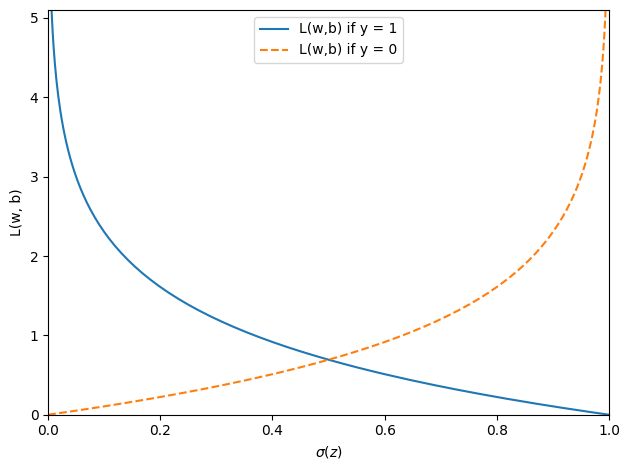

In [28]:
# 우선 샘플이 하나일 경우에 대한 분류 손실을 그려보자
# 앞전에 만든 sigmoid 활용 가능!
def loss_1(z): # y가 1 일때 얻게되는 손실
  return -np.log(sigmoid(z))

def loss_0(z): # y가 0일때 얻게 되는 손실
  return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label = 'L(w,b) if y = 1')
c2 = [loss_0(x) for x in z]
plt.plot(sigma_z, c2, linestyle = '--', label = 'L(w,b) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim(0.0, 1.0)
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()

즉, 해당 데이터의 레이블이 1이라면, sigma(z) 가 1에 가까울수록 합리적이고(이러한 데이터가 분포될 확률이 높고),
해당 데이터의 레이블이 0이라면, sigma(z)가 0에 가까울수록 합리적임

## 로지스틱 회귀를 구현해보자

In [29]:
# 이제 앞전에 해봤던 아달린 구현을 로지스틱 회귀 알고리즘으로 변경해보자
from classifiers.logistic import LogisticRegressionGD

In [30]:
# Iris-setosa와 Iris-versicolor 붓꽃만 가지고( 클래스 0과 클래스 1) 로지스틱 회귀 구현이 작동하는지 확인해보자
iris = datasets.load_iris()
# print(iris)
X = iris.data
y = iris.target

# X중에서 3번째와 4번째 특성만 활용하자 (아직은 2차원 visualization 만 가능하므로)
X = iris.data[:,[2,3]]
print('클래스 레이블 :',np.unique(y))

클래스 레이블 : [0 1 2]


In [31]:
# chapter3_2 에서 했던것처럼, X_train, y_train, X_test, y_test 로 나누자 (데이터 셔플과 stratify를 꼭 하자, 똑같은 결과를 얻고 싶다면 random state도 정해주자)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.3, random_state = 1, shuffle = True, stratify = y
)

# split 이 잘 되었는지 확인하자
print( np.bincount(y))
print( np.bincount(y_train))
print( np.bincount(y_test))


[50 50 50]
[35 35 35]
[15 15 15]


In [32]:
# standardization 또한 적용해주자
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # X_train의 평균과 std를 구한다
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

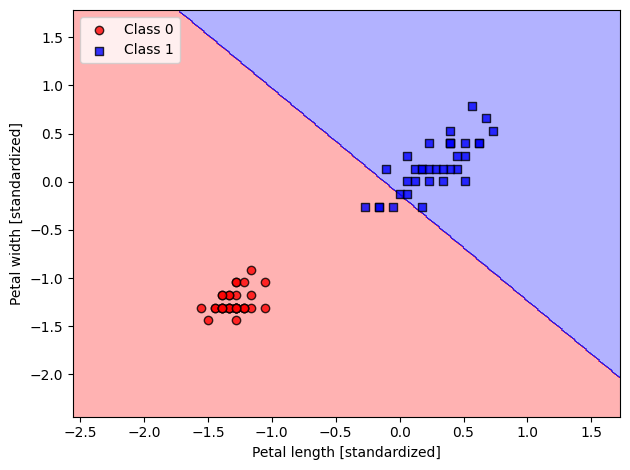

In [33]:
# 이제 진짜 Iris-setosa와 Iris-versicolor 붓꽃만 가지고 로지스틱 회귀를 작동시켜보자
# (우리가 구현한 logistic regression은 아직 이진 분류에만 적용할 수 있다는 걸 기억하자)
X_train_01_subset = X_train_std[ (y_train == 1) | (y_train == 0) ]
y_train_01_subset = y_train[(y_train==1) | (y_train == 0)]

# decision boundary 그려보자
from utils.plot_decision_regions import plot_decision_boundary
lgrd = LogisticRegressionGD()
lgrd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_boundary(X_train_01_subset, y_train_01_subset, lgrd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend( loc = 'upper left')
plt.tight_layout()
plt.show()

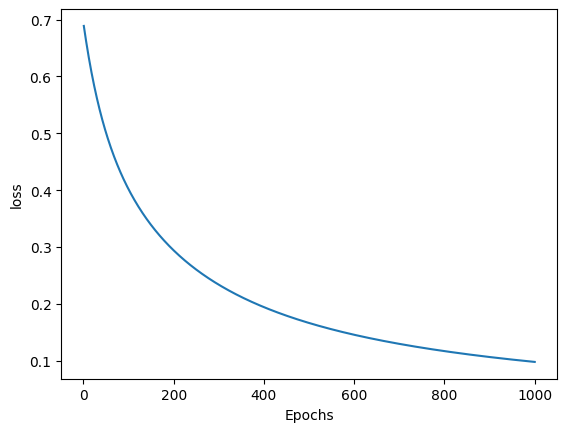

In [34]:
# 아마 learning rate 나 epoch이 부족한 것 같다 충분한 epoch 와 learning rate를 알아내기 위해 loss 를 분석해보자
lgrd = LogisticRegressionGD(n_iter = 1000)
lgrd.fit(X_train_01_subset, y_train_01_subset)
losses = lgrd.losses_

plt.plot( range( 1, len(losses) + 1), losses )
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.show()

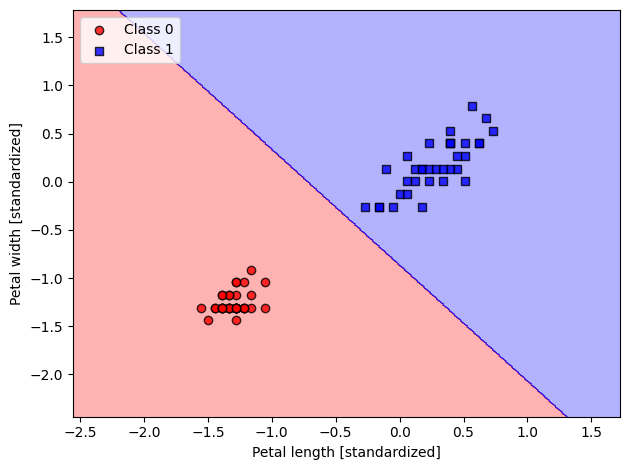

In [35]:
# 1000정도면 충분한 epoch 인것 같다
plot_decision_boundary(X_train_01_subset, y_train_01_subset, lgrd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend( loc = 'upper left')
plt.tight_layout()
plt.show()

# 3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련
이제 방금 한것을 사이킷럿라이브러리를 통해 똑같이 실행해보자
사이킷런 버전에서는 다중 분류도 지원함.

* 다중 클래스를 위한 기법으로 다항 회귀 (multinomial regression) 또는  OvR이 자동으로 선택됨

* 사이킷런의 LogisticRegressoin 클래스의 기본값은 multinomial 이고, 붓꽃 데이터셋처럼 상호 배타적인 클래스를 가진 문제에 권장됨

* '상호 배타적' 이란 각 훈련 샘플이 하나의 클래스에만 속할 수 있다는 의미(이에 반해 다중 레이블 분류의 경우 훈련 샘플 하나가 여러 개의 클래스에 속할 수 있음)

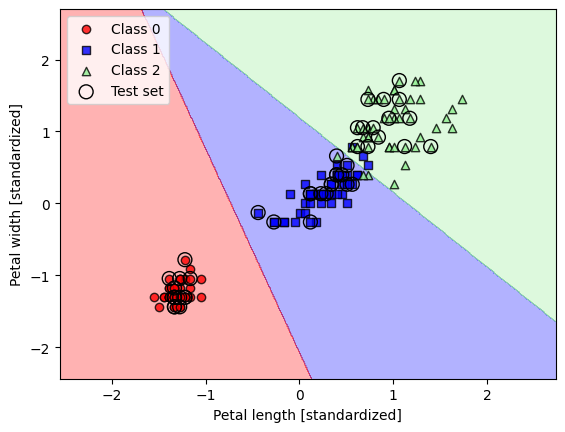

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train_std, y_train)

# X_train 과 X_test둘다 plot에 그려보자
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_boundary(X_combined_std, y_combined, classifier = lr, test_idx = range(105,150)) # y_test 의 개수가 45개이고,  y_train뒤에 hstack으로 쌓았으므로!
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend( loc = 'upper left')
plt.show()

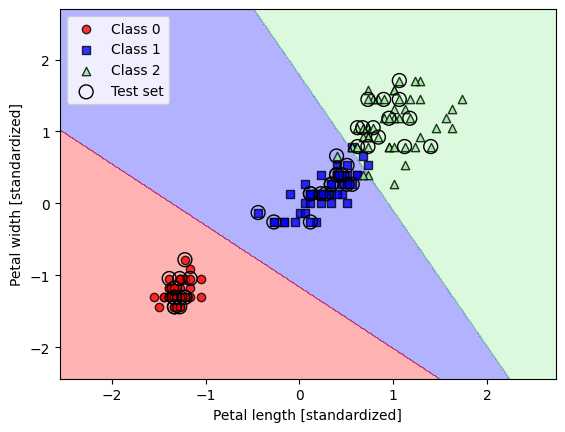

In [37]:
# multi_class로 ovr말고 multinomial 도 사용해보자
lr_multinomial = LogisticRegression(C = 100.0, solver = 'lbfgs', multi_class = 'multinomial')
lr_multinomial.fit(X_train_std, y_train)

plot_decision_boundary(X_combined_std, y_combined, classifier = lr_multinomial, test_idx = range(105,150)) # y_test 의 개수가 45개이고,  y_train뒤에 hstack으로 쌓았으므로!
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend( loc = 'upper left')
plt.show()

## 훈련 샘플이 어떤 클래스에 속할 확률은 어떻게 구하나요?

`predict_probab` 메서드를 이용해서 계산할 수 있어용

In [38]:
lr.predict_proba(X_test_std[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [39]:
# 당연하게도 열을기준으로 다 더하면 1이됨
lr.predict_proba(X_test_std[:3,:]).sum(axis = 1)

array([1., 1., 1.])

In [40]:
# 그리고 행에서 가장 큰 값의 열이 예측 레이블이 되므로, 다음과 같이 구할 수 있음
lr.predict_proba(X_test_std[:3,:]).argmax(axis = 1)

array([2, 0, 0])

In [41]:
# 실제 사이킷런을 사용할 때는 `predict` 메서드가 바로 클래스 레이블을 출력해줘
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

### !주의할점
사이킷런은 입력 데이터로 2차원 배열을 기대함
-> 샘플 하나의 클래스 예측을 할때에는 하나의 행을 2차원 포맷으로 먼저 변경해야 함. 넘파이 `reshape` 메서드를 이용하면 쉽게 해결 가능

In [42]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

# 3.3.5 규제를 사용하여 과대적합 피하기
사이킷런의 `LogisticRegression` 클래스의 C매개변수는 다음 절에서 볼 서포트 벡터 머신 형식에서 따왔음.

C매개변수는 규제 하이퍼파라메터 $\lambda$ 의 역수이므로, 역 규제 파라미터 C의 값을 감소시키면 규제 강도가 증가함.

두 개의 가중치에 대해 L2규제 효과를 그래프로 나타내 보자.

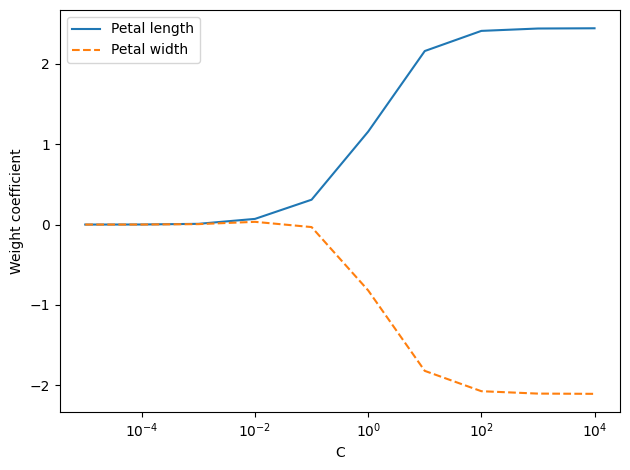

In [43]:
# multi_class 를 ovr로 가져가고, (이러면 클래스 개수마다 weight가 생김)
# 10개의 서로 다른 역 규제 파라미터 C에 대해서, logistic regression 모델을 훈련시킨 후,
# 클래스 1의 가중치만 뽑아서 서로 비교해보자
# TODO : 모든 클래스의 가중치들을 각각 다른 plot에 그려서 비교해보자

weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C = 10.**c, multi_class = 'ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1]) # 클래스 1의 가중치만 뽑음
  params.append(10.**c)

weights = np.array(weights)
plt.plot( params, weights[:,0], label = 'Petal length') # w0
plt.plot( params, weights[:,1], linestyle = '--', label = 'Petal width') # w1

plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.tight_layout()
plt.show()

결과적으로 C 매개변수가 감소하면 가중치 절대값이 줄어듬. 즉, 규제 강도가 증가함

! 위의 실험을 multi_class = 'multinomial' 로 지정하더라도 C값에 따른 가중치 변화를 볼 수 있지만, 다른 클래스의 영향 때문에 위 그림보다 복잡하고 불규칙한 그래프가 그려짐

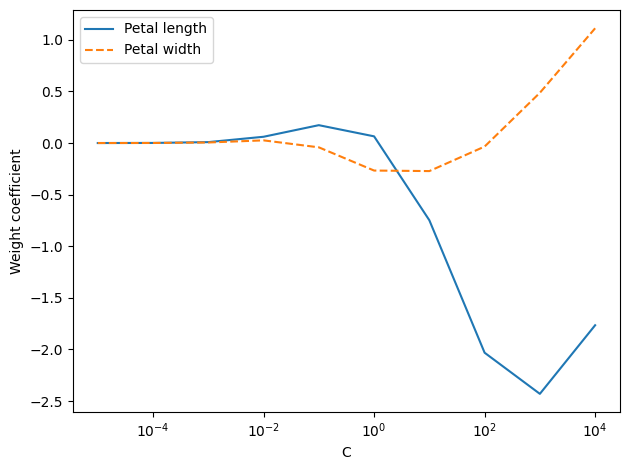

In [45]:
# multi_class 를 multinomial로 지정했을때

weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C = 10.**c, multi_class = 'multinomial')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1]) # 클래스 1의 가중치만 뽑음
  params.append(10.**c)

weights = np.array(weights)
plt.plot( params, weights[:,0], label = 'Petal length') # w0
plt.plot( params, weights[:,1], linestyle = '--', label = 'Petal width') # w1

plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.tight_layout()
plt.show()